#**Challenge N° 2: Análisis de evasión de clientes**#

##**📌 Extracción**##

Importaciones necesarias y lectura de la información:

In [114]:
import pandas as pd
import numpy as np

In [115]:
Url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [116]:
data = pd.read_json(Url)
data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##**🔧 Transformación**##

Revisión de tipo de datos que maneja la información:

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [118]:
data.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


Normalizado de arrays o listas anidadas dentro de presentación inicial de los datos, adicional se concatenan las nuevas listas de datos de manera adyescente a columnas principales:

In [119]:
customer_norm = pd.json_normalize(data['customer'])
phone_norm    = pd.json_normalize(data['phone'])
internet_norm = pd.json_normalize(data['internet'])
account_norm  = pd.json_normalize(data['account'])

df_final = pd.concat([data[['customerID', 'Churn']],
                      customer_norm,
                      phone_norm,
                      internet_norm,
                      account_norm], axis=1)


Se consulta el tipo de datos que se manejan en el nuevo conjunto de datos que pertenecen al dataFrame:

In [120]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [121]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [122]:
df_final.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


Verificamos información inconsistente existente en el conjunto de datos: Valores únicos, valores NaN, valores '' ó valores ' ':

In [123]:
for col in df_final.columns:
    print(f'Columna: {col}')
    print(f'Valores únicos: {df_final[col].unique()}')
    print(f'Vores   NaN:{df_final[col].isna().sum()}')
    print(f"Valores  '':{df_final[df_final[col] == ''].shape[0]} ")
    print(f"Valores ' ':{df_final[df_final[col] == ' '].shape[0]} ")
    print('=' * 30)

Columna: customerID
Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: Churn
Valores únicos: ['No' 'Yes' '']
Vores   NaN:0
Valores  '':224 
Valores ' ':0 
Columna: gender
Valores únicos: ['Female' 'Male']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: SeniorCitizen
Valores únicos: [0 1]
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: Partner
Valores únicos: ['Yes' 'No']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: Dependents
Valores únicos: ['Yes' 'No']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: tenure
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: PhoneService
Valores únicos: ['Yes' 'No']
Vores   NaN:0
Valores  ''

####**Tratamiento de datos con datos atípicos**####

In [124]:
df_final['Churn'] = df_final['Churn'].replace('', 'Unknown')
df_final['Churn'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [125]:
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)
df_final['Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [126]:
df_final['Charges.Total'] = df_final['Charges.Total'].replace(' ', '0')

transformamos rótulos de columnas a minúsculas:

In [127]:
df_final.columns = df_final.columns.str.lower()

Validación de datos y sus correcciones:

In [128]:
for col in df_final.columns:
    print(f'Columna: {col}')
    print(f'Valores únicos: {df_final[col].unique()}')
    print(f'Vores   NaN:{df_final[col].isna().sum()}')
    print(f"Valores  '':{df_final[df_final[col] == ''].shape[0]} ")
    print(f"Valores ' ':{df_final[df_final[col] == ' '].shape[0]} ")
    print('=' * 30)

Columna: customerid
Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: churn
Valores únicos: ['No' 'Yes' 'Unknown']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: gender
Valores únicos: ['Female' 'Male']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: seniorcitizen
Valores únicos: [0 1]
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: partner
Valores únicos: ['Yes' 'No']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: dependents
Valores únicos: ['Yes' 'No']
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: tenure
Valores únicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Vores   NaN:0
Valores  '':0 
Valores ' ':0 
Columna: phoneservice
Valores únicos: ['Yes' 'No']
Vores   NaN:0
Valore

In [129]:
df_final.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Creación de columna de cuentas diarias 'daily_accounts'

In [130]:
df_final['daily_accounts'] = round((df_final['charges.monthly']/ 30), 3)
df_final.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,daily_accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.187
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.997
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.797


transformamos el tipo de datos correspondientes ya sea a int o float con ayuda NumPy:

In [131]:
col_to_int = ['seniorcitizen','tenure']


In [132]:
df_final[col_to_int] = df_final[col_to_int].astype(np.int64)

In [133]:
df_final['charges.total'] = df_final['charges.total'].astype(np.float64)

In [134]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   object 
 5   dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   object 
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


##**📊 Carga y análisis**##

Extraemos información descriptiva de los datos:

In [135]:
df_final.describe()

,seniorcitizen,tenure,charges.monthly,charges.total,daily_accounts
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157341
std,0.369074,24.571773,30.129572,2268.648587,1.004322
min,0.000000,0.000000,18.250000,0.000000,0.608000
25%,0.000000,9.000000,35.425000,396.200000,1.181000
50%,0.000000,29.000000,70.300000,1389.200000,2.343000
75%,0.000000,55.000000,89.875000,3778.525000,2.996000
max,1.000000,72.000000,118.750000,8684.800000,3.958000


Importamos las herramientas para graficar y poder tener un entorno para analizar de manera visual toda la información:

In [136]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [137]:
churn_counts = df_final['churn'].value_counts()

fig = px.pie(churn_counts, values=churn_counts.values, names=churn_counts.index,
             title='Distribución de clientes por evasión (Churn)')
fig.update_layout(width= 850, height=500, font_size=14)

fig.show()

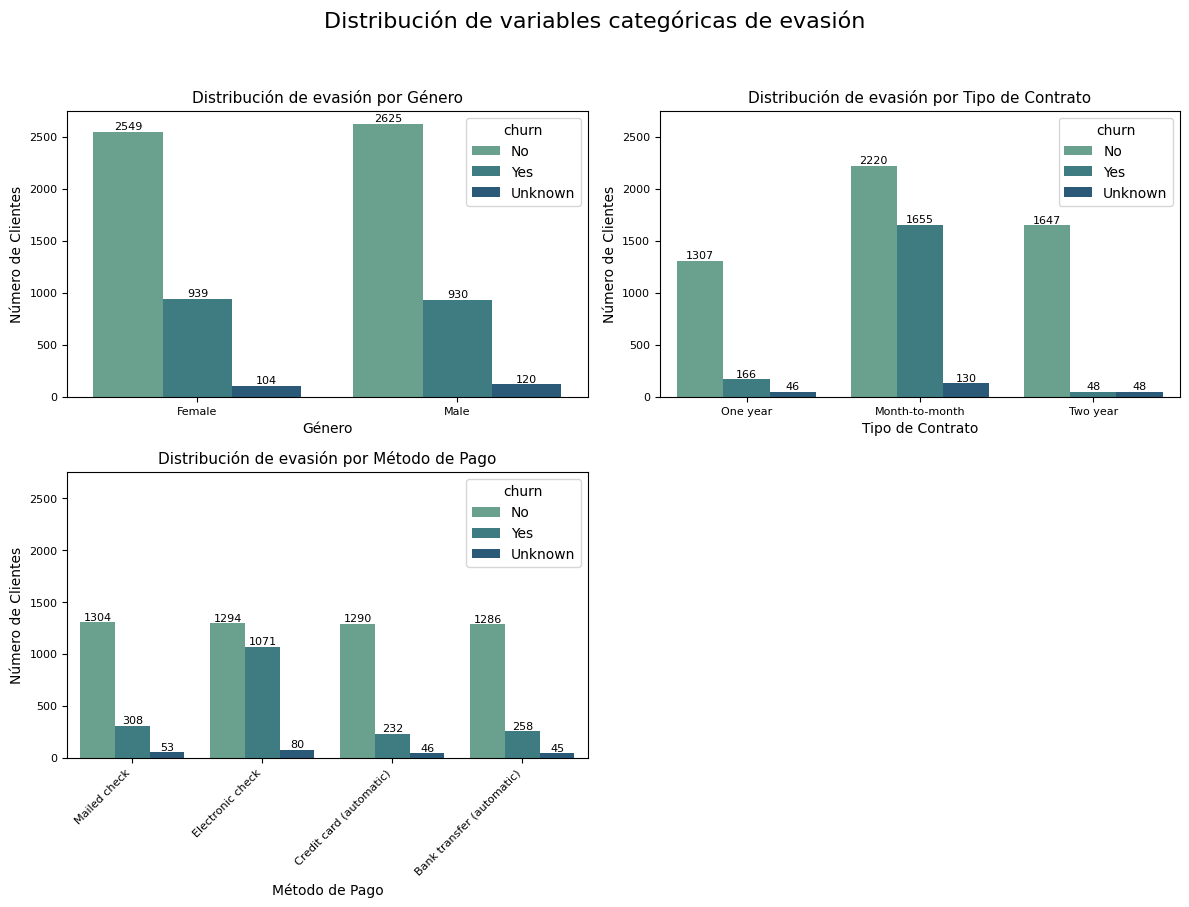

In [138]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9.5))
fig.subplots_adjust(hspace= 0.4, wspace=0.6)
fig.suptitle('Distribución de variables categóricas de evasión', fontsize=16)

# Churn vs Género
sns.countplot(x='gender', hue='churn', data=df_final, palette='crest', ax=axs[0,0])
axs[0,0].set_title('Distribución de evasión por Género', fontsize = 11)
axs[0,0].set_xlabel('Género', fontsize= 10)
axs[0,0].set_ylabel('Número de Clientes', fontsize= 10)
axs[0,0].xaxis.set_tick_params(labelsize=8)
axs[0,0].yaxis.set_tick_params(labelsize=8)
for container in axs[0,0].containers:
    axs[0,0].bar_label(container, fmt='%d', fontsize=8)


# Churn vs Contrato
sns.countplot(x='contract', hue='churn', data=df_final, palette='crest', ax=axs[0,1])
axs[0,1].set_title('Distribución de evasión por Tipo de Contrato', fontsize = 11)
axs[0,1].set_xlabel('Tipo de Contrato', fontsize= 10)
axs[0,1].set_ylabel('Número de Clientes', fontsize= 10)
axs[0,1].xaxis.set_tick_params(labelsize=8)
axs[0,1].yaxis.set_tick_params(labelsize=8)
for container in axs[0,1].containers:
    axs[0,1].bar_label(container, fmt='%d', fontsize=8)


# Churn vs Método de pago
sns.countplot(x='paymentmethod', hue='churn', data=df_final, palette='crest', ax=axs[1,0])
axs[1,0].set_title('Distribución de evasión por Método de Pago', fontsize = 11)
axs[1,0].set_xlabel('Método de Pago', fontsize= 10)
axs[1,0].set_ylabel('Número de Clientes', fontsize= 10)
axs[1,0].xaxis.set_tick_params(labelsize=8)
axs[1,0].yaxis.set_tick_params(labelsize=8)

ticks = axs[1,0].get_xticks()
labels = axs[1,0].get_xticklabels()
axs[1,0].set_xticks(ticks)
axs[1,0].set_xticklabels(labels, rotation=45, horizontalalignment='right', fontsize= 8)
for container in axs[1,0].containers:
    axs[1,0].bar_label(container, fmt='%d', fontsize=8)

fig.delaxes(axs[1,1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

ymin = 0
ymax = 2750

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

plt.show()

In [139]:
# Histograma interactivo para Total gastado'charges.total'
fig_charges = px.histogram(df_final,
                           x='charges.total',
                           color='churn',
                           marginal='box', # Add boxplot on the marginal
                           nbins=50,      # Adjust number of bins
                           title='Distribución de evasión por Valor Total Gastado')
fig_charges.update_layout(xaxis_title='Total Gastado', yaxis_title='Frecuencia')


# Histograma interactivo para tiempo de tenencia 'tenure'
fig_tenure = px.histogram(df_final,
                          x='tenure',
                          color='churn',
                          marginal='box', # Add boxplot on the marginal
                          nbins=50,     # Adjust number of bins
                          title='Distribución evasión por Tiempo de Contrato')
fig_tenure.update_layout(xaxis_title='Tiempo de Contrato (meses)', yaxis_title='Frecuencia')

fig_charges.show()
fig_tenure.show()


##**📄Informe final**##

##Informe Final: Análisis de Evasión de Clientes TelecomX##

---

####Introducción:####

El presente informe tiene como objetivo analizar los factores que influyen en la evasión de clientes categorizado como (churn) en el conjunto de datos de TelecomX. Es importante saber la razón por la cual los clientes deciden dejar de utilizar los servicios es crucial para desarrollar estrategias de retención efectivas.


####Hallazgos Clave:####

Tasa de Evasión General: La distribución inicial del churn muestra que una proporción significativa de clientes ha evadido. (Basado en el gráfico circular de la distribución de Churn). Específicamente, se observa que Mencionar el porcentaje o número de clientes en cada categoría de churn: 'Yes', 'No', 'Unknown' manteniendo y considerando la categoría 'Unknown' del total de clientes que han evadido.



####Variables Categóricas y Churn:####

- Género: El análisis por género no nos da un indicativo que afecte o no el índice de evasión si el cliente es hombre o mujer.

- Tipo de Contrato (contract): Existe una clara relación entre el tipo de contrato y la evasión. Los clientes con contratos mes a mes (Month-to-month) presentan una tasa de evasión considerablemente **más alta** en comparación con aquellos con contratos de uno o dos años. Esto sugiere que los contratos a más largo plazo están asociados con una mayor retención de clientes.

- Método de Pago (paymentmethod): El método de pago también parece influir en la evasión. Los clientes que utilizan el pago electrónico (Electronic check) muestran **una mayor** intención de evasión en comparación con otros métodos de pago como el cheque por correo, la tarjeta de crédito automática o la transferencia bancaria automática.



####Variables Numéricas y Churn:####

- Valor Total Gastado (charges.total): La distribución del total gastado muestra una diferencia bastante  significativa  entre los clientes que evaden y los que no. Los clientes que **han evadido** tienden a tener un **gasto total más bajo**, concentrándose en los rangos de **menor gasto**. Por el contrario, los clientes que no han evadido muestran una distribución con valores de gasto total **más altos**. Esto indica que los clientes con mayor gasto total tienen una menor probabilidad de evadir.

- Tiempo de Contrato (tenure): El tiempo que un cliente lleva con la empresa está fuertemente relacionado con la evasión. **Los clientes que evaden** suelen tener un tiempo de contrato significativamente **menor**, lo que sugiere que la evasión ocurre con mayor frecuencia en las etapas tempranas de la relación con el cliente. **Los clientes con mayor antigüedad** tienden a ser **más leales**.



####Conclusiones y Recomendaciones Preliminares:####

Teniendo como referencia los factores evaluados anteriormente sobre el fenómeno de evasión en los clientes de TelecomX, se tiene lo siguiente:

- Los clientes con contratos **mes a mes** tienen un mayor riesgo de evasión. Se recomienda implementar estrategias para incentivar el cambio  a contratos de mayor duración.

- El uso del pago electrónico (Electronic check) está asociado con **una mayor evasión**. Podría ser útil investigar las razones detrás de esta correlación y considerar si existen problemas en este método de pago o si atrae a un tipo de cliente más propenso a evadir.

- Los clientes con **menor tiempo de contrato y menor gasto total** son **más propensos a evadir**. Esto resalta la importancia de las estrategias de incorporación y fidelización en las primeras etapas de la relación con el cliente, así como la identificación de clientes de bajo valor que podrían necesitar atención especial.

